In [121]:
import psycopg2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import plotly.graph_objs as go
import seaborn as sns
import vaex
import numpy as np
import requests as re
import datetime as dt
import datetime as dt
from datetime import date
from datetime import time
import scipy.stats as st
from scipy.stats import norm, normaltest
import statistics
import statsmodels.api as sm
from scipy import stats
import plotly.express as px
from scipy.stats import kstest
from scipy.stats import shapiro
plt.rcParams["figure.figsize"] = (15,6)

## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [41]:
df_flights = pd.read_csv('/Users/perpetualokafor/Downloads/mid-term-project-I/flights.csv')

In [42]:
df_flights.head(5)

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-06-11,UA,UA,UA,1102,UA,N401UA,1102,13871,...,781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-06-11,UA,UA,UA,1101,UA,N474UA,1101,11697,...,1703.0,8.0,0.0,0.0,0.0,33.0,NaN,NaN,NaN,NaN
2,2,2018-06-11,UA,UA,UA,1100,UA,N14249,1100,13930,...,1829.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN
3,3,2018-06-11,UA,UA,UA,1094,UA,N62884,1094,12953,...,1620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-06-11,UA,UA,UA,1093,UA,N39423,1093,11292,...,862.0,NaN,NaN,NaN,NaN,NaN,803.0,7.0,7.0,NaN


In [43]:
pd.isnull(df_flights).sum()

Unnamed: 0                   0
fl_date                      0
mkt_unique_carrier           0
branded_code_share           0
mkt_carrier                  0
mkt_carrier_fl_num           0
op_unique_carrier            0
tail_num                 15097
op_carrier_fl_num            0
origin_airport_id            0
origin                       0
origin_city_name             0
dest_airport_id              0
dest                         0
dest_city_name               0
crs_dep_time                 0
dep_time                 70596
dep_delay                71677
taxi_out                 74253
wheels_off               74253
wheels_on                76959
taxi_in                  76959
crs_arr_time                 0
arr_time                 75315
arr_delay                85237
cancelled                    0
cancellation_code      4926687
diverted                     0
dup                          0
crs_elapsed_time             9
actual_elapsed_time      84680
air_time                 86317
flights 

In [44]:
df_flights = df_flights.drop(['Unnamed: 0','cancellation_code','carrier_delay','weather_delay',
                              'nas_delay','security_delay','late_aircraft_delay',
                              'first_dep_time','total_add_gtime','longest_add_gtime','no_name'], axis=1)

In [45]:
df_flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,4.929404e+06,4.928323e+06,4.925747e+06,4.925747e+06,4.923041e+06,...,5.000000e+06,4.924685e+06,4.914763e+06,5.000000e+06,5.000000e+06,4.999991e+06,4.915320e+06,4.913683e+06,5000000.0,5.000000e+06
mean,2.741302e+03,2.741283e+03,1.268088e+04,1.268074e+04,1.328271e+03,1.332735e+03,9.365500e+00,1.752723e+01,1.357543e+03,1.462763e+03,...,1.485503e+03,1.467629e+03,4.026565e+00,1.466260e-02,2.272000e-03,1.380149e+02,1.330198e+02,1.078662e+02,1.0,7.670685e+02
std,1.852774e+03,1.852905e+03,1.521999e+03,1.521910e+03,4.884775e+02,5.005404e+02,4.613261e+01,9.880385e+00,5.015651e+02,5.276661e+02,...,5.147346e+02,5.317883e+02,4.822718e+01,1.201982e-01,4.761133e-02,7.141936e+01,7.130463e+01,6.950750e+01,0.0,5.846651e+02
min,1.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,-7.200000e+01,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-1.170000e+02,0.000000e+00,0.000000e+00,-1.430000e+02,6.000000e+00,-1.384000e+03,1.0,3.100000e+01
25%,1.141000e+03,1.141000e+03,1.129200e+04,1.129200e+04,9.150000e+02,9.190000e+02,-6.000000e+00,1.100000e+01,9.340000e+02,1.047000e+03,...,1.102000e+03,1.051000e+03,-1.500000e+01,0.000000e+00,0.000000e+00,8.700000e+01,8.200000e+01,5.800000e+01,1.0,3.380000e+02
50%,2.339000e+03,2.339000e+03,1.288900e+04,1.288900e+04,1.320000e+03,1.326000e+03,-2.000000e+00,1.500000e+01,1.340000e+03,1.501000e+03,...,1.513000e+03,1.505000e+03,-7.000000e+00,0.000000e+00,0.000000e+00,1.190000e+02,1.150000e+02,8.900000e+01,1.0,6.030000e+02
75%,4.317000e+03,4.317000e+03,1.405700e+04,1.405700e+04,1.732000e+03,1.741000e+03,5.000000e+00,2.100000e+01,1.756000e+03,1.908000e+03,...,1.916000e+03,1.913000e+03,7.000000e+00,0.000000e+00,0.000000e+00,1.670000e+02,1.630000e+02,1.370000e+02,1.0,1.001000e+03
max,9.401000e+03,9.401000e+03,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,2.976000e+03,1.425000e+03,2.400000e+03,2.400000e+03,...,2.400000e+03,2.400000e+03,2.973000e+03,1.000000e+00,1.000000e+00,1.509000e+03,7.370000e+02,7.010000e+02,1.0,5.095000e+03


In [69]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'datetime', 'day', 'month', 'year'],
      dtype='object')

In [71]:
df_flights['month'].unique()

array([ 6, 11, 12, 10,  9,  1,  5])

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [105]:
#Get the mean & std of arr_delay column.
mean_arr_delay = df_flights.arr_delay.mean()
std_arr_delay = df_flights.arr_delay.std()
#Print mean & std
print('Mean:',mean_arr_delay)
print('STD:',std_arr_delay)

Mean: 4.026516479458285
STD: 48.22706907062364


In [107]:
mean_dep_delay = df_flights.dep_delay.mean()
std_dep_delay = df_flights.dep_delay.std()
print('Mean:',mean_dep_delay)
print('STD:',std_dep_delay)

Mean: 9.323221275697772
STD: 46.01443519452327


(-300.0, 300.0)

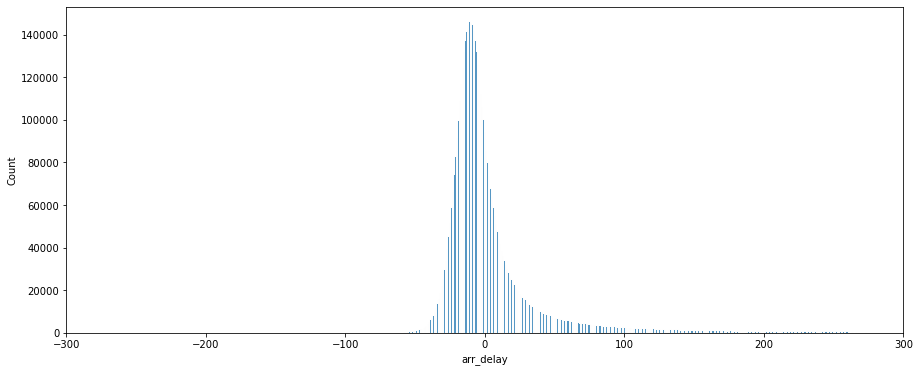

In [110]:
# arr_delay
arr_delay = df_flights['arr_delay']
sns.histplot(arr_delay)
plt.xlim(-300, 300)

(-300.0, 300.0)

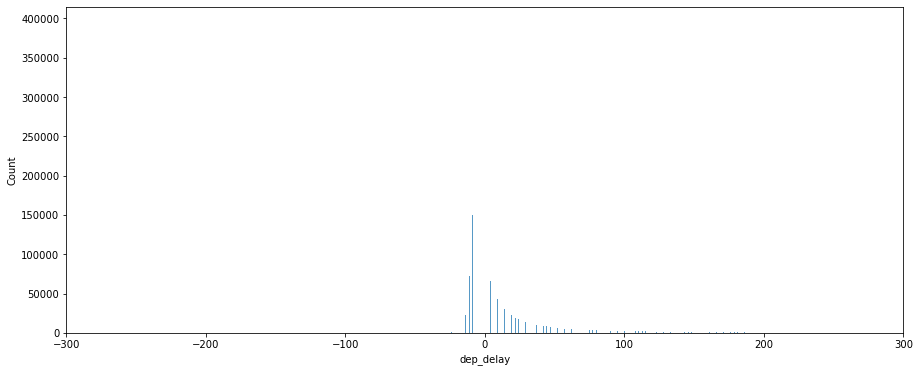

In [111]:
# dep_delay
dep_delay = df_flights['dep_delay']
sns.histplot(dep_delay)
plt.xlim(-300, 300)

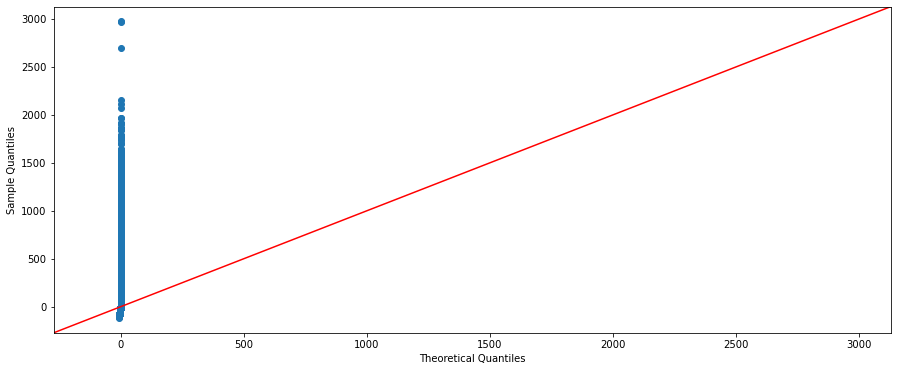

In [114]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(arr_delay, line='45')

plt.show()
#if points fall on a straight line then we assume it is normally distributed. this case it is not

In [116]:
#(Formal Statistical Test) Perform a Shapiro-Wilk Test.
#If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.
shapiro(arr_delay)

ShapiroResult(statistic=nan, pvalue=1.0)

In [117]:
shapiro(dep_delay)

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
#it is not a normal distribution.
#mean is not 0

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [50]:
df_flights['datetime'] = pd.to_datetime(df_flights.fl_date)
df_flights['day'] = df_flights['datetime'].dt.day
df_flights['month'] = df_flights['datetime'].dt.month
df_flights['year'] = df_flights['datetime'].dt.year

In [51]:
mean_month_arr_delay = df_flights.groupby('month', as_index=False)['arr_delay'].mean()
print(mean_month_arr_delay)

   month  arr_delay
0      1   4.714467
1      5   5.670677
2      6   9.554866
3      9   0.476529
4     10   3.063703
5     11   0.458006
6     12   5.110636


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

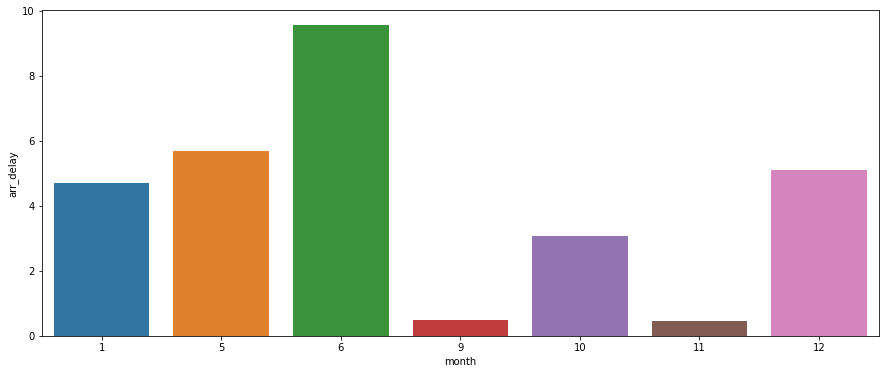

In [72]:
sns.barplot(x='month',y='arr_delay',data=mean_month_arr_delay)

In [75]:
mean_month_dep_delay = df_flights.groupby('month',as_index=False)['dep_delay'].mean()
print(mean_month_dep_delay)

   month  dep_delay
0      1   9.995247
1      5  10.481504
2      6  13.898666
3      9   6.496049
4     10   7.113434
5     11   6.801944
6     12  10.863976


<AxesSubplot:xlabel='month', ylabel='dep_delay'>

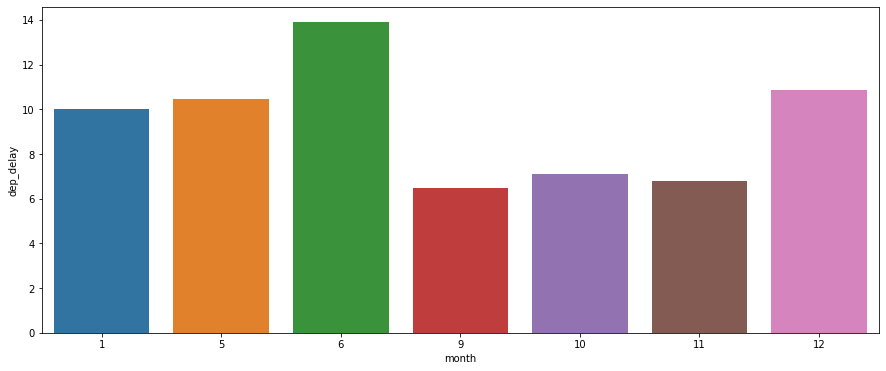

In [77]:
sns.barplot(x='month',y='dep_delay',data=mean_month_dep_delay)

In [ ]:
#Don't have all my data but seems like flights are delayed mainly in June

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [54]:
city_df = df_flights.drop_duplicates('origin_city_name')[['origin_city_name','fl_date']]

In [55]:
city_df_sample = city_df.sample(100)

In [56]:
weather_data = city_df_sample.values.tolist()

In [57]:
weather = []
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history"
api_key = '8FKLHVPA65QJLV5CM3JXZZN5E'

for i in weather_data:
    
    start_date = dt.datetime.strptime(i[1], "%Y-%m-%d")
    end_date = start_date + dt.timedelta(days=1)

    
    querystring = {"contentType":"json",
               "startDateTime":f"{str(start_date.date())}T00:00:00",
               "aggregateHours":"24","location":f"{i[0]}",
               "endDateTime":f"{str(end_date.date())}T00:00:00",
               "unitGroup":"us",
               "key":api_key}
    
    res = re.request("GET", url, params=querystring)
    weather.append(res.json())

In [58]:
weather_list = []
for i in range(len(weather_data)):
    if i == None:
        pass
    else:
        weather_list.append(weather[i]['locations'][weather_data[i][0]]['values'][0]['conditions'])

In [59]:
city_df_sample['weather'] = weather_list
city_df_sample.head()

,origin_city_name,fl_date,weather
2203,"Newport News/Williamsburg, VA",2018-06-11,"Rain, Overcast"
25553,"Grand Forks, ND",2018-06-12,Partially cloudy
25687,"Valdosta, GA",2018-06-12,"Rain, Partially cloudy"
1932,"Hagerstown, MD",2018-06-11,"Rain, Overcast"
15697,"Rochester, MN",2018-06-11,Partially cloudy


In [60]:
weather_sampledf = pd.merge(city_df_sample, df_flights[['dep_delay','arr_delay']], left_index=True, right_index=True)
weather_sampledf.sort_values('arr_delay',ascending=False)

,origin_city_name,fl_date,weather,dep_delay,arr_delay
2067,"Springfield, IL",2018-06-11,"Rain, Overcast",643.0,633.0
1739,"Springfield, MO",2018-06-11,Clear,231.0,227.0
1377,"West Palm Beach/Palm Beach, FL",2018-06-11,"Rain, Overcast",95.0,98.0
861,"Medford, OR",2018-06-11,Partially cloudy,93.0,96.0
50982,"Santa Maria, CA",2018-06-13,Clear,73.0,90.0
...,...,...,...,...,...
50049,"Adak Island, AK",2018-06-13,Clear,-42.0,-46.0
1572,"Concord, NC",2018-06-11,"Rain, Partially cloudy",NaN,NaN
1363,"Anchorage, AK",2018-06-11,"Rain, Overcast",182.0,NaN
4538,"Salisbury, MD",2018-06-11,"Rain, Overcast",NaN,NaN


In [61]:
weather_sampledf.sort_values('dep_delay',ascending=False)

,origin_city_name,fl_date,weather,dep_delay,arr_delay
2067,"Springfield, IL",2018-06-11,"Rain, Overcast",643.0,633.0
1739,"Springfield, MO",2018-06-11,Clear,231.0,227.0
1363,"Anchorage, AK",2018-06-11,"Rain, Overcast",182.0,NaN
1377,"West Palm Beach/Palm Beach, FL",2018-06-11,"Rain, Overcast",95.0,98.0
861,"Medford, OR",2018-06-11,Partially cloudy,93.0,96.0
...,...,...,...,...,...
50049,"Adak Island, AK",2018-06-13,Clear,-42.0,-46.0
1572,"Concord, NC",2018-06-11,"Rain, Partially cloudy",NaN,NaN
4538,"Salisbury, MD",2018-06-11,"Rain, Overcast",NaN,NaN
1245,"Fayetteville, AR",2018-06-11,Clear,NaN,-5.0


<AxesSubplot:xlabel='weather', ylabel='arr_delay'>

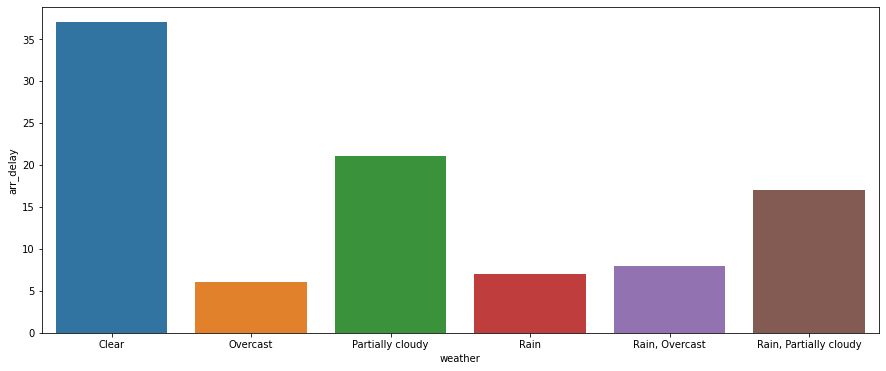

In [62]:
weather_arr_delay = weather_sampledf.groupby('weather',as_index=False)['arr_delay'].count()
sns.barplot(x='weather',y='arr_delay',data=weather_arr_delay)

<AxesSubplot:xlabel='weather', ylabel='dep_delay'>

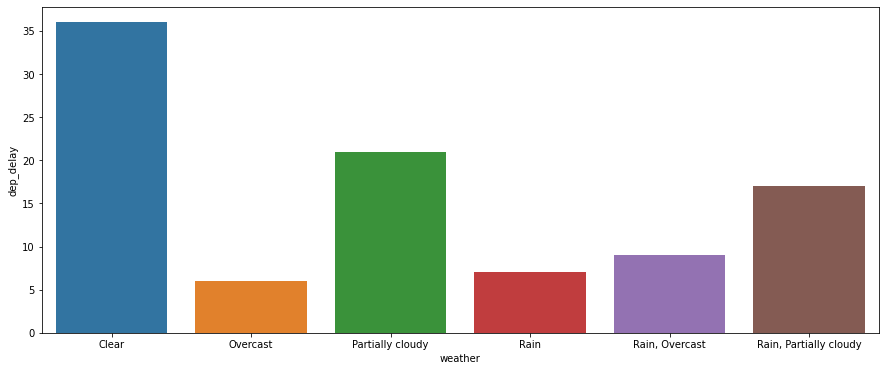

In [63]:
weather_dep_delay = weather_sampledf.groupby('weather',as_index=False)['dep_delay'].count()
sns.barplot(x='weather',y='dep_delay',data=weather_dep_delay)

In [ ]:
#doesnt seem like weather is a significant indicator of delays because there are higher delays when the weather is good

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [78]:
df_taxi = df_flights[['fl_date','taxi_out','origin','dep_time']]
df_taxi.sort_values(by=['fl_date'])

,fl_date,taxi_out,origin,dep_time
4417413,2018-05-01,34.0,DSM,745.0
4422802,2018-05-01,10.0,BUF,754.0
4422801,2018-05-01,16.0,LGA,952.0
4422800,2018-05-01,23.0,LGA,2020.0
4422799,2018-05-01,31.0,DTW,1432.0
...,...,...,...,...
3096342,2019-12-31,9.0,ORD,1503.0
3096341,2019-12-31,27.0,GJT,555.0
3096340,2019-12-31,29.0,DFW,1119.0
3096356,2019-12-31,NaN,DTW,NaN


In [79]:
df_taxi[['fl_date','origin','taxi_out','dep_time']].groupby(['origin','fl_date','dep_time']).sum()


taxi_out
origin fl_date    dep_time          
ABE    2018-05-01 542.0          9.0
                  554.0         18.0
                  600.0         10.0
                  626.0         12.0
                  755.0         11.0
...                              ...
YUM    2019-12-31 932.0         14.0
                  1246.0        12.0
                  1323.0         9.0
                  1722.0        11.0
                  2204.0         9.0

[4042577 rows x 1 columns]

<AxesSubplot:ylabel='origin,fl_date,dep_time'>

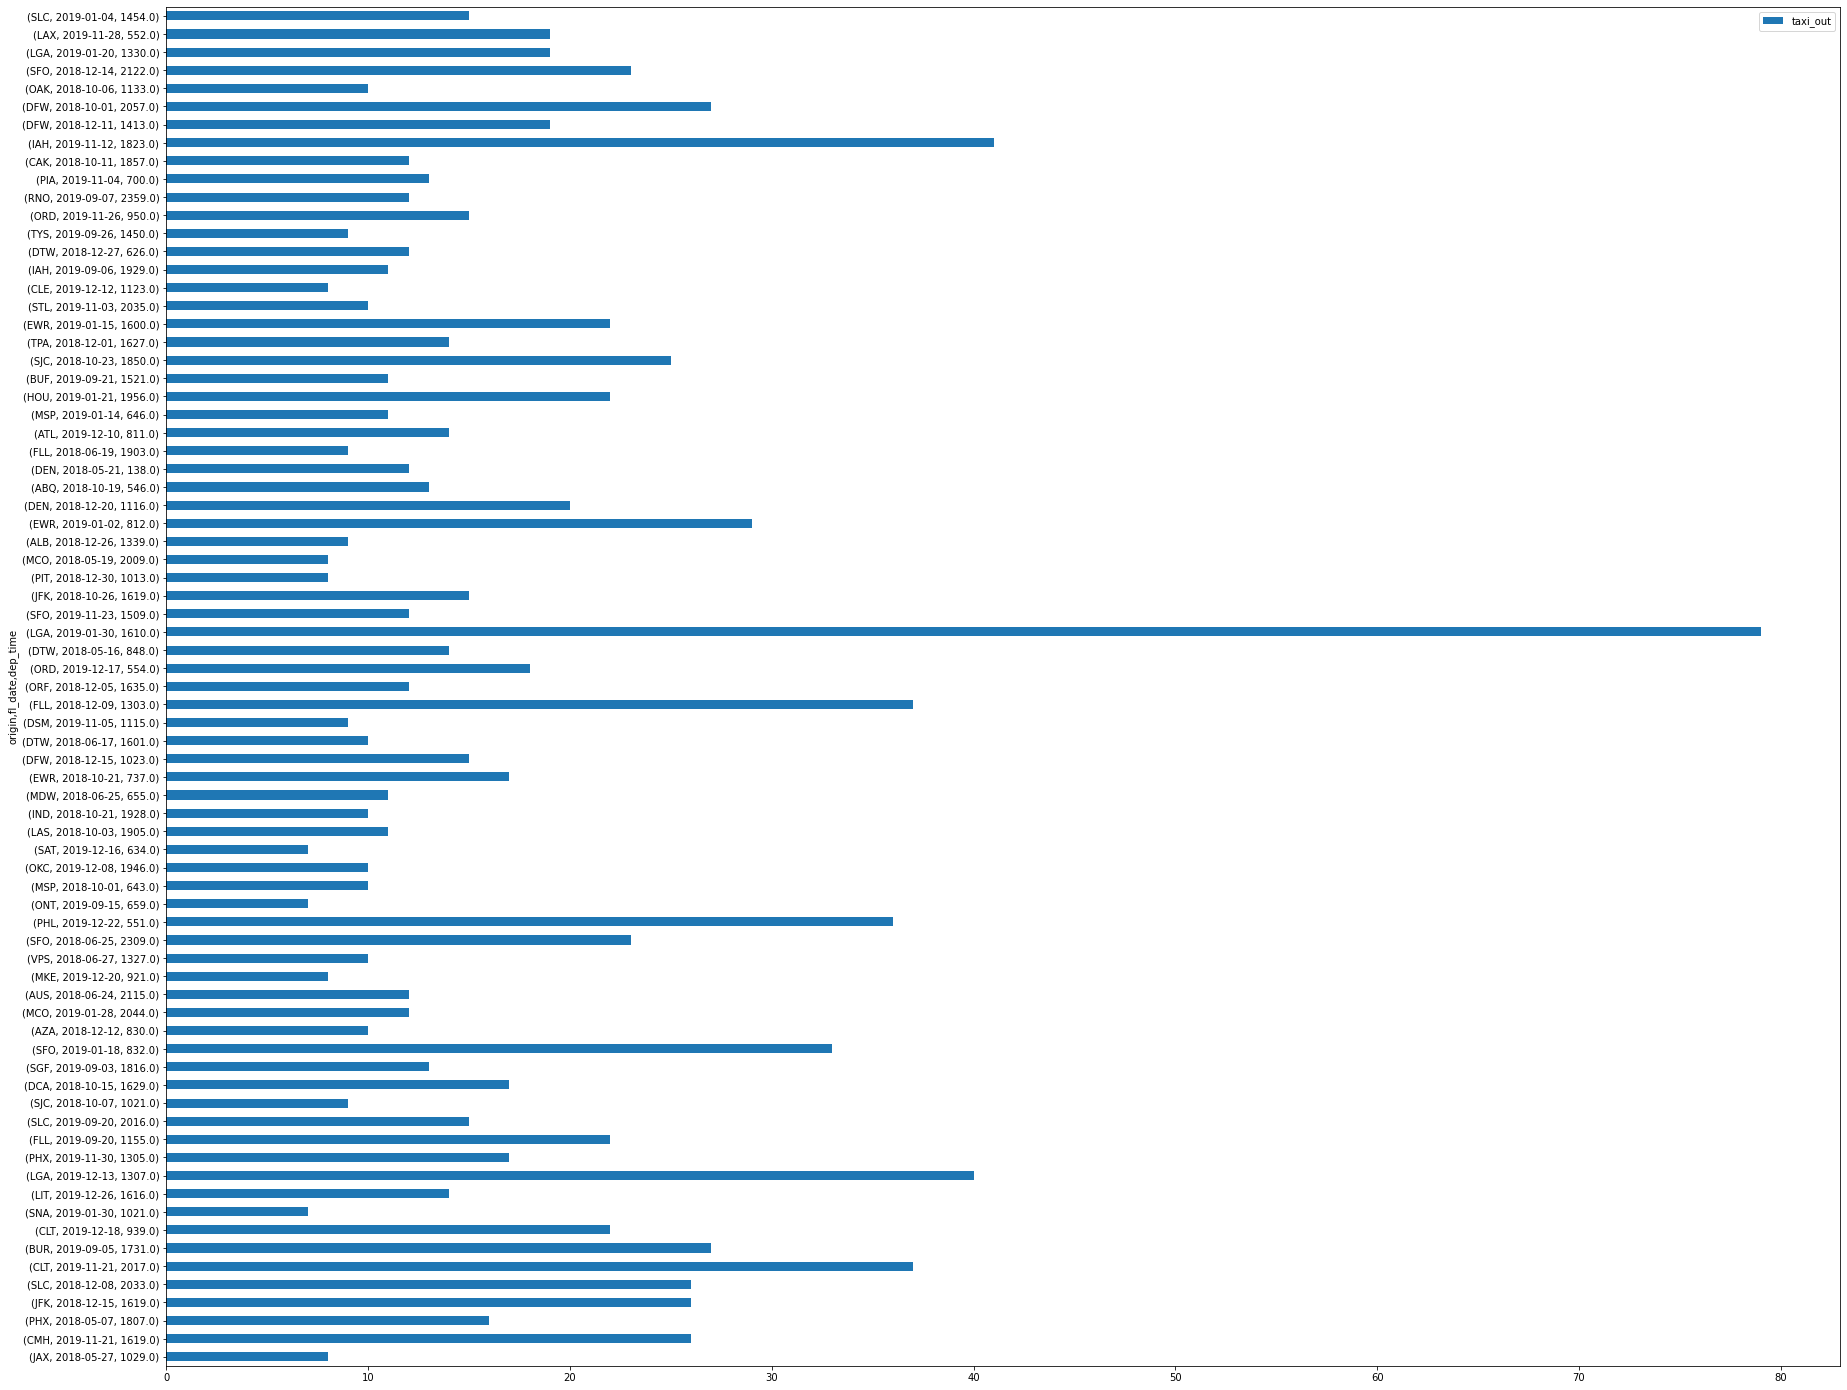

In [80]:
#Since there are a large number of rows we will use a sample of 150.
df_taxi_sample = df_taxi.sample(150)
# plot data, sample of 75.
df_taxi_sample = df_taxi_sample[['fl_date','origin','dep_time','taxi_out']].groupby(['origin','fl_date','dep_time']).sum().sample(75)
df_taxi_sample.plot.barh(figsize=(30, 25))

In [81]:
#create arrival and dept time hour columns
df_flights['arr_hour'] = df_flights['arr_time'].astype(str).str[:-4]
df_flights['dep_hour'] = df_flights['dep_time'].astype(str).str[:-4]
df_flights = df_flights.dropna(axis=0, how='any', subset=['arr_time','dep_time'])

In [82]:


# group by arrival hour, aggregated by mean of taxi in time and count of flights
df_arr = df_flights[['arr_hour', 'taxi_in','flights']].groupby(['arr_hour']).agg({'taxi_in':'mean', 'flights':'count'})
df_arr = df_arr.drop(index='')

# group by departure hour, aggregated by mean of taxi out time and count of flights
df_dep = df_flights[['dep_hour', 'taxi_out','flights']].groupby(['dep_hour']).agg({'taxi_out':'mean', 'flights':'count'})
df_dep = df_dep.drop(index='')

In [83]:
df_arr = df_arr.reset_index()
df_dep = df_dep.reset_index()

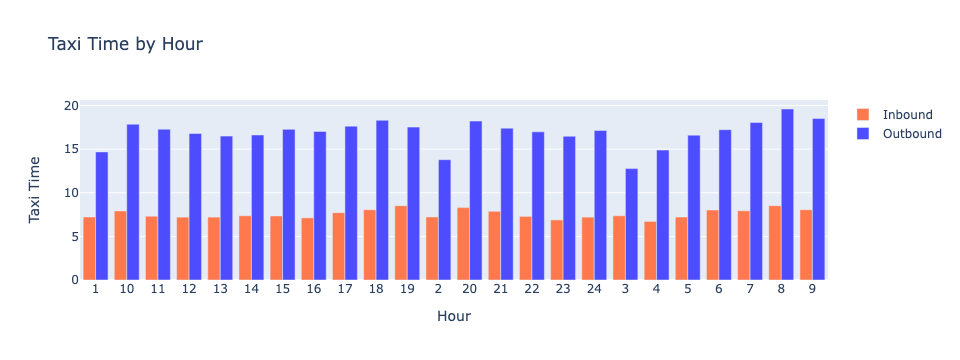

In [84]:
# trace1 - Departure delays
trace1 = go.Bar(
    x=df_arr['arr_hour'],
    y=df_arr['taxi_in'],
    name = 'Inbound',
    marker=dict(color='#ff794d')
)

# trace2 - Arrival delays
trace2 = go.Bar(
    x=df_dep['dep_hour'],
    y=df_dep['taxi_out'],
    name = 'Outbound',
    marker=dict(color='#4d4dff')
)

# create the data
data = [trace1, trace2]

# create the layout
layout = go.Layout(
    title= 'Taxi Time by Hour',
    xaxis=dict(
        title='Hour',
        tickmode='linear'),
    yaxis=dict(
        title='Taxi Time')
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [25]:
df5 = df[df.carrier_delay.notnull()]

In [26]:
df5a = df5[['mkt_unique_carrier','dep_delay','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]
df5a

,mkt_unique_carrier,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
3,F9,92.0,109.0,92.0,0.0,17.0,0.0,0.0
4,F9,92.0,73.0,0.0,0.0,0.0,0.0,73.0
5,F9,53.0,43.0,0.0,0.0,0.0,0.0,43.0
10,F9,-8.0,16.0,0.0,0.0,16.0,0.0,0.0
16,F9,-8.0,20.0,0.0,0.0,20.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4999968,DL,23.0,20.0,0.0,0.0,0.0,0.0,20.0
4999973,DL,928.0,913.0,0.0,0.0,913.0,0.0,0.0
4999988,DL,29.0,17.0,12.0,0.0,0.0,0.0,5.0
4999991,DL,29.0,18.0,1.0,0.0,0.0,0.0,17.0


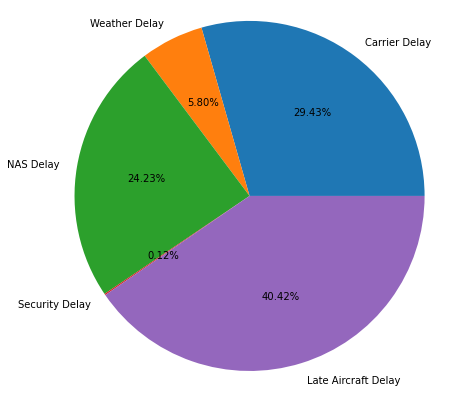

In [27]:
# Delay types pie chart
labels = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
sizes = [df5a.carrier_delay.sum(),
         df5a.weather_delay.sum(),
         df5a.nas_delay.sum(),
         df5a.security_delay.sum(),
         df5a.late_aircraft_delay.sum()
        ]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

In [ ]:
#are airlines able to lower the delay


#### **Task 6**: How many states cover 50% of US air traffic? 

In [64]:
#Take relevant columns
#Split origin_city_name to a State column
#Sum the air_traffic and groupby state.
#Sort in descending order.

df_tsk6 = df_flights[['origin_city_name','air_time']]
df_tsk6[['origin_city_name','state']] = df_tsk6['origin_city_name'].str.split(', ',expand=True)
df_tsk6show = df_tsk6.groupby('state',as_index=False)['air_time'].sum().sort_values(by='air_time',ascending=False)
print("Total air Traffic per state for sample size:",df_tsk6show['air_time'].sum())
print("50% of air Traffic per state for sample size:",df_tsk6show['air_time'].sum()/2)
print("Top 6 States cover 50% of US traffic:",df_tsk6show['air_time'].head(6).sum())

/var/folders/lf/ty8sx7z57pl1_74grkt85j_c0000gn/T/ipykernel_6351/3347579825.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lf/ty8sx7z57pl1_74grkt85j_c0000gn/T/ipykernel_6351/3347579825.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total air Traffic per state for sample size: 530020307.0
50% of air Traffic per state for sample size: 265010153.5
Top 6 States cover 50% of US traffic: 249248559.0


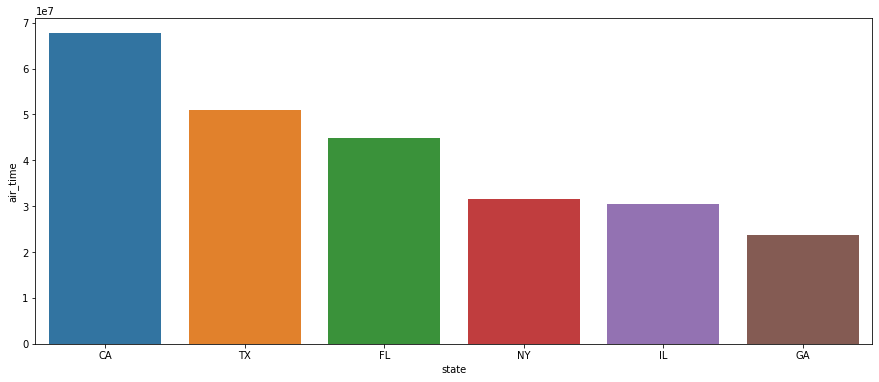

In [65]:
sns.barplot(x='state',y='air_time',data=df_tsk6show.head(6))
plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [85]:
import warnings
warnings.filterwarnings('ignore')

#Relevant columns: dep_delay, air_time, distance
#Append a column called avg_speed.
#Average speed = (air_time/distance) * 60
#Sort values deep_delay to see weather planes fly faster when there is a departure delay.

df_tsk7 = df_flights[['dep_delay','air_time','distance']].dropna()
df_tsk7['avg_speed'] = (df_flights['distance'] / df_flights['air_time'])*60
df_tsk7.sort_values(by='dep_delay',ascending=False).head(10)

,dep_delay,air_time,distance,avg_speed
907506,2976.0,77.0,442.0,344.415584
907505,2962.0,79.0,442.0,335.696203
2686211,2710.0,107.0,607.0,340.373832
2208810,2109.0,49.0,196.0,240.000000
1287103,2098.0,37.0,227.0,368.108108
2311789,2066.0,53.0,258.0,292.075472
1009668,1979.0,103.0,865.0,503.883495
1184124,1979.0,43.0,228.0,318.139535
710886,1930.0,123.0,1055.0,514.634146
2213311,1921.0,28.0,144.0,308.571429


In [86]:
#Test the hypothesis whether planes fly faster when there is a departure delay.
dep_delay_lst = df_tsk7['dep_delay']
avg_speed_lst = df_tsk7['avg_speed']
stat, p_value = st.ttest_rel(dep_delay_lst,avg_speed_lst)
alpha=0.5
print('stat:',stat)
print('p-value:',p_value)
if p_value > alpha:
    print("Planes fly faster when there is a departure delay.")
else:
    print("Plane speed did not change significantly when there is a departure delay.")

stat: -9844.042587890634
p-value: 0.0
Plane speed did not change significantly when there is a departure delay.


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [87]:
#Algorithm to convert float to time format.
string_num = []
for i in df_flights['dep_time']:
    str_time = str(i)
    if len(str_time) == 4:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:1] + ":" + str_time[1:]
        string_num.append('00:00')
    elif len(str_time) == 5:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:1] + ":" + str_time[1:]
        string_num.append(str_time)
    elif len(str_time) == 6:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:2] + ":" + str_time[2:]
        string_num.append(str_time)
    else:
        string_num.append('--:--')



In [88]:
#Algorithm to create categories of LONG, SHORT, MEDIUM.
category_list = []
for i in df_flights['air_time']:
    if i <= 180:
        category_list.append('SHORT')
    elif i > 180 and i <= 360:
        category_list.append('MEDIUM')
    elif i > 360:
        category_list.append('LONG')
    else:
        category_list.append('NOT_APPLICABLE')

In [89]:
#Assign the list to the dataframe.
df_tsk8 = df_flights[['dep_time','air_time','distance']]
df_tsk8['time_format'] = string_num
df_tsk8['haul_type'] = category_list
df_tsk8[['time_hour','time_second']] = df_tsk8['time_format'].str.split(':',expand=True)
#df_tsk8 = df_tsk8.dropna()
df_tsk8.head(3)

,dep_time,air_time,distance,time_format,haul_type,time_hour,time_second
0,612.0,107.0,781.0,6:12,SHORT,6,12
1,2010.0,216.0,1703.0,20:10,MEDIUM,20,10
2,958.0,237.0,1829.0,9:58,MEDIUM,9,58


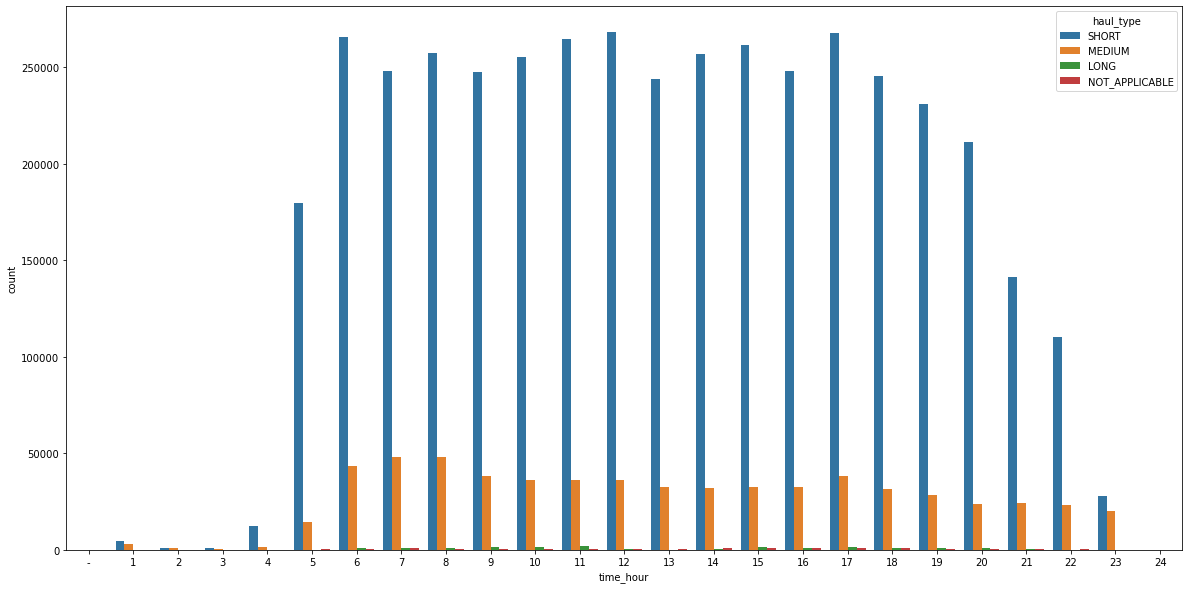

In [90]:
plt.rcParams["figure.figsize"] = (20,10)
sns.countplot(x="time_hour", hue="haul_type", data=df_tsk8, 
              order = ['-','1', '2', '3', '4', '5',
               '6','7','8','9','10','11',
              '12','13','14','15','16','17',
              '18','19','20','21','22','23','24'])
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [91]:
df_tsk9 = df_flights.groupby(['origin'],as_index=False).size()
#Top 10 busiest airports by biggest number of flights.
df_tsk9 = df_tsk9.sort_values(by=['size'],ascending=False)
df_tsk9 = df_tsk9.rename(columns={'size':'number_of_flights'})
df_tsk9.head(10)

,origin,number_of_flights
22,ATL,242622
256,ORD,242500
95,DFW,181232
94,DEN,172064
74,CLT,155787
195,LAX,155531
320,SEA,117693
271,PHX,111128
169,IAH,110999
103,DTW,108178


In [92]:
df_passengers = pd.read_csv('/Users/perpetualokafor/Downloads/mid-term-project-I/passengers.csv')
df_passengers.head()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,26.0,25.0,388625.0,1250.0,1035.0,0.0,0.0,577.0,3308.0,...,US,United States,6,530,1,2019,12,2,F,DU
1,1,26.0,26.0,323000.0,1300.0,1112.0,0.0,0.0,296.0,2088.0,...,US,United States,6,629,1,2019,12,1,F,DU
2,2,26.0,25.0,288500.0,1250.0,1030.0,0.0,0.0,387.0,2330.0,...,US,United States,6,629,1,2019,12,1,F,DU
3,3,26.0,26.0,421320.0,1690.0,1513.0,0.0,0.0,164.0,1667.0,...,US,United States,6,631,1,2019,12,1,F,DU
4,4,26.0,26.0,340500.0,1300.0,502.0,0.0,0.0,280.0,1773.0,...,US,United States,6,629,1,2019,12,1,F,DU


In [93]:
df_tsk9b = df_passengers[['passengers','origin_airport_id','origin','origin_city_name']]
df_tsk9b = df_tsk9b.sort_values(by=['passengers'], ascending=False)
#Top 10 busiest airports by passenger traffic.
df_tsk9b = df_tsk9b.groupby(['origin_airport_id','origin','origin_city_name'],as_index=False)[['passengers']].sum()
df_tsk9b = df_tsk9b.sort_values(by=['passengers'], ascending=False)
df_tsk9b = df_tsk9b.rename(columns={'passengers':'total_passengers'})
df_tsk9b.head(10)

,origin_airport_id,origin,origin_city_name,total_passengers
139,10397,ATL,"Atlanta, GA",257478059.0
1083,12892,LAX,"Los Angeles, CA",205745255.0
1452,13930,ORD,"Chicago, IL",194019087.0
495,11298,DFW,"Dallas/Fort Worth, TX",163888490.0
493,11292,DEN,"Denver, CO",151024252.0
953,12478,JFK,"New York, NY",148927079.0
1744,14771,SFO,"San Francisco, CA",133266076.0
1081,12889,LAS,"Las Vegas, NV",117526251.0
1732,14747,SEA,"Seattle, WA",113960665.0
397,11057,CLT,"Charlotte, NC",112838675.0


In [94]:
#The Top 10 busiest airports by the biggest number of flights and the passenger traffic they cover.
pd.merge(df_tsk9.head(10),df_tsk9b,how = "left", on = "origin")

,origin,number_of_flights,origin_airport_id,origin_city_name,total_passengers
0,ATL,242622,10397,"Atlanta, GA",257478059.0
1,ORD,242500,13930,"Chicago, IL",194019087.0
2,DFW,181232,11298,"Dallas/Fort Worth, TX",163888490.0
3,DEN,172064,11292,"Denver, CO",151024252.0
4,CLT,155787,11057,"Charlotte, NC",112838675.0
5,LAX,155531,12892,"Los Angeles, CA",205745255.0
6,SEA,117693,14747,"Seattle, WA",113960665.0
7,PHX,111128,14107,"Phoenix, AZ",109444579.0
8,IAH,110999,12266,"Houston, TX",103908868.0
9,DTW,108178,11433,"Detroit, MI",86099463.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [95]:
#Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
df_tsk10a = df_flights.groupby(['month','op_unique_carrier'])[['arr_delay']].agg('mean')
df_tsk10a.head()

arr_delay
month op_unique_carrier           
1     9E                  4.344391
      AA                  3.279720
      AS                  0.405415
      AX                 14.102972
      B6                 14.557512

In [96]:
#Find out the distance covered monthly by different air carriers
df_tsk10b = df_flights.groupby(['month','op_unique_carrier'])[['distance']].agg('sum')
df_tsk10b.head()

distance
month op_unique_carrier            
1     9E                  9353544.0
      AA                 74731088.0
      AS                 26865018.0
      AX                  2676774.0
      B6                 26225716.0

<AxesSubplot:xlabel='month'>

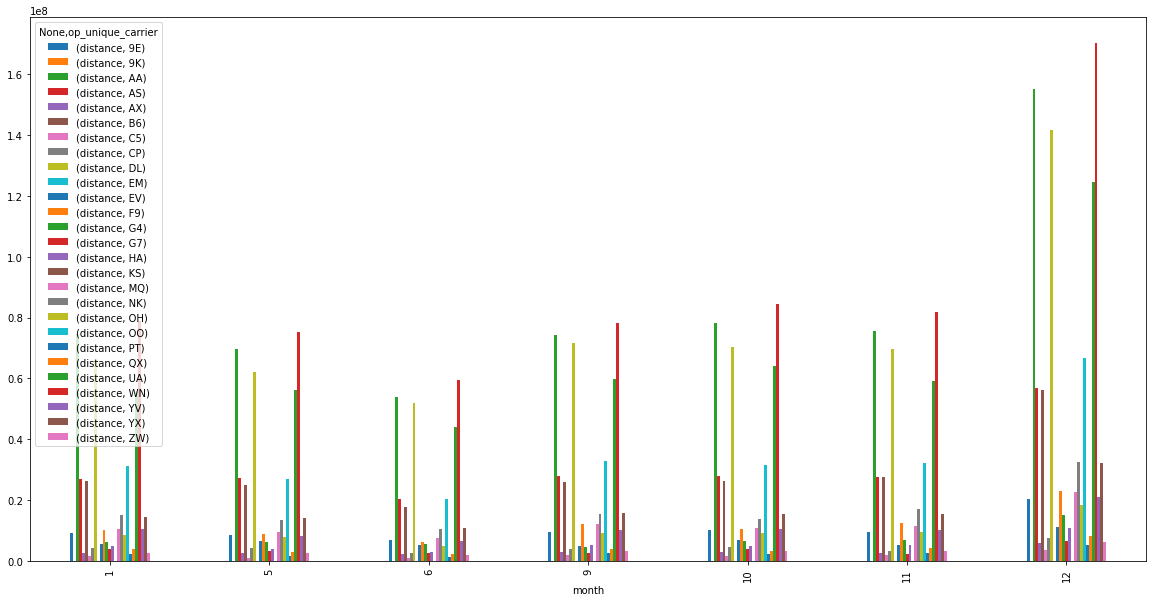

In [97]:
df_tsk10b.unstack().plot.bar()

In [98]:
#Find out the number of passengers that were carried by different air carriers
df_tsk10c = df_passengers.groupby(['unique_carrier_name','unique_carrier'])[['passengers']].agg('sum').reset_index()
df_tsk10c = df_tsk10c[(df_tsk10c != 0).all(1)]
df_tsk10c.head(10)

,unique_carrier_name,unique_carrier,passengers
0,40-Mile Air,Q5,3830.0
1,ABC Aerolineas SA de CV dba Interjet,4O,7938301.0
2,ABS JETS A.S,2AQ,618.0
5,ACM AIR CHARTER GmbH,0CQ,950.0
6,"ADVANCED AIR, LLC",AN,40026.0
7,Abelag Aviation AG,AAB,10.0
8,Acropolis Aviation Ltd.,CRV,851.0
9,Aer Lingus Plc,EI,9578430.0
11,Aerodynamics Inc. d/b/a SkyValue d/b/a SkyValu...,AJQ,180313.0
12,"Aeroenlaces Nacionales, S.A. de C.V. d/b/a Viv...",VB,1140129.0


In [99]:
df_fuel_consum = pd.read_csv('/Users/perpetualokafor/Downloads/mid-term-project-I/fuel_comsumption.csv')
df_fuel_consum.head()

,Unnamed: 0,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016


In [100]:
#Find out total fuel comsumption per air carrier
df_tsk10d = df_fuel_consum.groupby(['carrier_name','unique_carrier'])[['total_gallons']].agg('sum').reset_index()
df_tsk10d = df_tsk10d[(df_tsk10d != 0).all(1)]
df_tsk10d.head()

,carrier_name,unique_carrier,total_gallons
0,ABX Air Inc,ABX,6.367883e+06
1,Air Transport International,8C,4.061171e+07
2,Air Wisconsin Airlines Corp,ZW,1.306834e+08
3,Alaska Airlines Inc.,AS,2.678455e+09
4,Allegiant Air,G4,8.497621e+08
